# **Study Case**

**Task 1**
* There is a mushroom dataset. Based on the dataset, compare the performance between the Decision Tree and RandomForest algorithms. Use hyperparameter tuning to get the best parameters and accuracy.

**Task 2**
* There is a mushroom dataset. Based on the dataset, compare the performance between the Decision Tree and AdaBoost algorithms. Use hyperparameter tuning to get the best parameters and accuracy.

**Task 3**

Using the diabetes dataset, create a voting ensemble with the algorithm

1. Logistic Regression
2. SVM kernel polynomial
3. Decision Tree

You may explore by doing hyperparameter tuning

## **Import Library**

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## **Task 1**

### Preprocessing

In [70]:
# Load the dataset
mushrooms = pd.read_csv('data/mushrooms.csv')

mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [71]:
# Using LabelEncoder to convert all category columns to numeric
label_encoder = LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column] = label_encoder.fit_transform(mushrooms[column])

# Preprocessing: Assume the last column is the target ('class')
X = mushrooms.drop('class', axis=1)  # Features
y = mushrooms['class']  # Target

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Decision Tree

Decision Tree Test Accuracy: 1.00
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


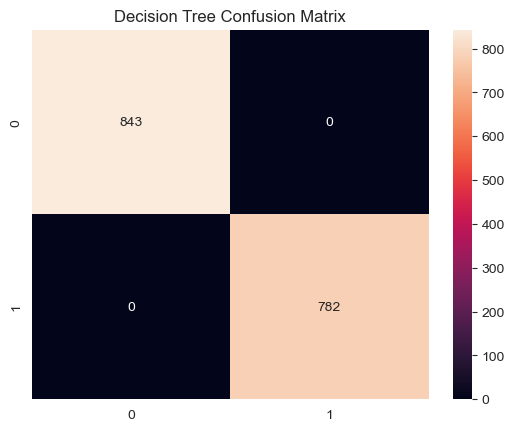

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Best Decision Tree model
best_dt = grid_search_dt.best_estimator_

# Test accuracy
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy: {accuracy_dt:.2f}")

# Classification report and confusion matrix
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()

### Random Forest

Random Forest Test Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


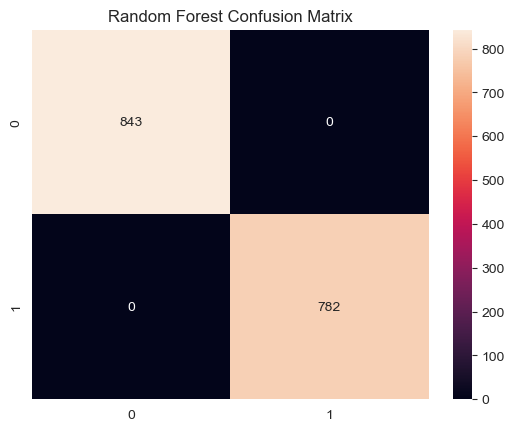

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Create Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest model
best_rf = grid_search_rf.best_estimator_

# Test accuracy
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.2f}")

# Classification report and confusion matrix
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

## **Task 2**

### AdaBoost

AdaBoost Test Accuracy: 1.00
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


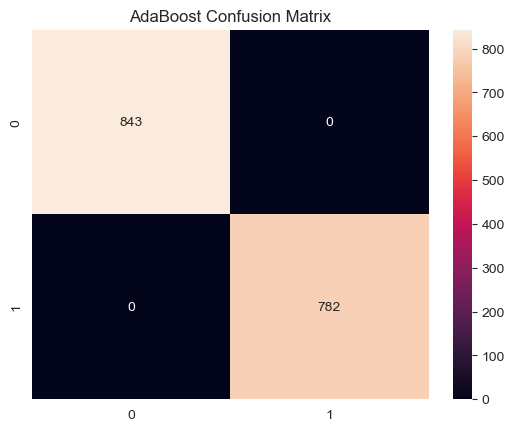

In [74]:
from sklearn.ensemble import AdaBoostClassifier

# Hyperparameter tuning for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Create AdaBoost model using the default base estimator (DecisionTreeClassifier)
ada = AdaBoostClassifier(random_state=42, algorithm="SAMME")

# Set up GridSearchCV for AdaBoost
grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_ada.fit(X_train, y_train)

# Best AdaBoost model
best_ada = grid_search_ada.best_estimator_

# Test accuracy
y_pred_ada = best_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Test Accuracy: {accuracy_ada:.2f}")

# Classification report and confusion matrix
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))

cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d')
plt.title("AdaBoost Confusion Matrix")
plt.show()

## **Task 3**

### Preprocessing Dataset

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Load the dataset
diabetes = pd.read_csv('data/diabetes.csv')

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
# Check if there are missing values
print(diabetes.isnull().sum())

# Assume the last column is the target ('Outcome') based on the typical structure of diabetes datasets
X = diabetes.drop('Outcome', axis=1)  # Features
y = diabetes['Outcome']  # Target

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values (important for Logistic Regression and SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Logistic Regression Hyperparameter Tuning

In [77]:
# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Create Logistic Regression model
lr = LogisticRegression(random_state=42)

# Set up GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Best Logistic Regression model
best_lr = grid_search_lr.best_estimator_

### SVM Kernel Polynomial Hyperparameter Tuning

In [78]:
# Hyperparameter tuning for SVM with polynomial kernel
param_grid_svm = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],  # Polynomial degrees
    'kernel': ['poly']
}

# Create SVM model
svm = SVC(random_state=42)

# Set up GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best SVM model
best_svm = grid_search_svm.best_estimator_

### Decision Tree Hyperparameter Tuning

In [79]:
# Define hyperparameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Best Decision Tree model
best_dt = grid_search_dt.best_estimator_
print(f"Best Decision Tree Parameters: {grid_search_dt.best_params_}")

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}


### Ensemble Voting Classifier

Voting Classifier Test Accuracy: 0.79
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        99
           1       0.73      0.67      0.70        55

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154


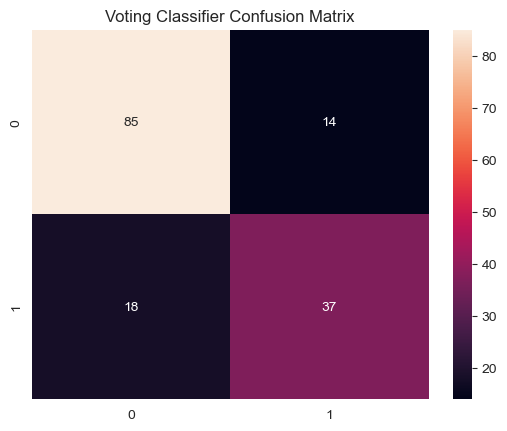

In [80]:
# Create the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('svm', best_svm),
    ('dt', best_dt)
], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Test accuracy
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Test Accuracy: {accuracy_voting:.2f}")

# Classification report and confusion matrix
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

cm_voting = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm_voting, annot=True, fmt='d')
plt.title("Voting Classifier Confusion Matrix")
plt.show()